# Import Resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read In And Display Image

In [2]:
# Read image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out type of img data and its dimentions
print('this image is:' , type(image) , ' , with dimentions:' , image.shape)

this image is: <class 'numpy.ndarray'>  , with dimentions: (514, 816, 3)


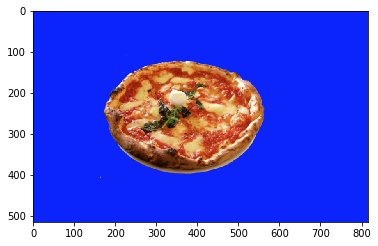

In [5]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy , cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image_copy)

# Define The Color Threshold

In [8]:
x = 100
y = 100
print(image_copy[y , x])

[ 11  36 251]


In [31]:
lower_blue = np.array([0 , 0 , 200])
upper_blue = np.array([250 , 250 , 255])

# Create A Mask

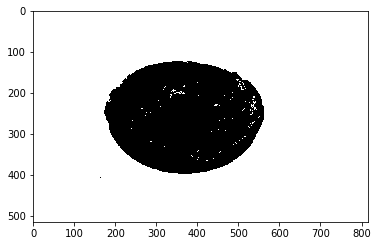

In [32]:
# Define the masked area
mask = cv2.inRange(image_copy , lower_blue , upper_blue)

# Visualize the mask
plt.imshow(mask , cmap = 'gray')

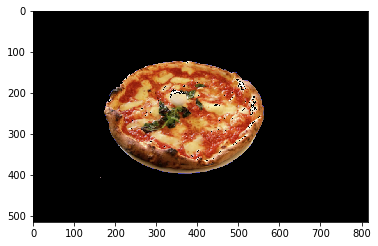

In [33]:
# mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0 , 0 , 0]

# Display it
plt.imshow(masked_image)

# Mask And Add A Background Image

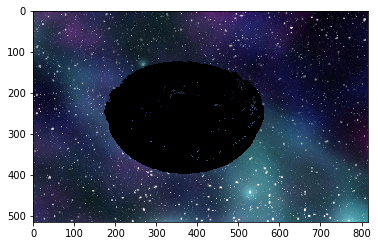

In [34]:
# Load in a background image , and convert it to RGB
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image , cv2.COLOR_BGR2RGB)

# Crop it to the right size (514 x 816)
crop_background = background_image[0:514 , 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0 , 0 , 0]

# Display the background
plt.imshow(crop_background)

# Create A Complete Image

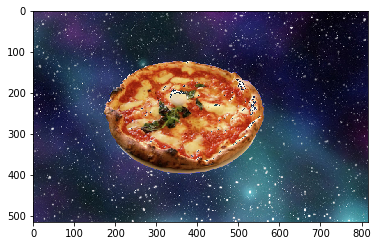

In [35]:
# Add the 2 images together to create a complete image
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)